In [1]:
from src.base import FDTD2D
from src.templates import simulation_step_template, point_source, plane_source, update_Dz_inc, set_boundaries
from src.templates import update_Ez_inc, update_Hx_inc, update_Hy_inc
from src.utilis import *
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Parameters
params = {
    'nx': 200,
    'ny': 200,
    'time_steps': 200,
    'dx':25e-9,
    'dy': 25e-9,
    # PML
    'use_pml' : True,
    'pml_thickness': 20,
    'polarization': 'TM',
    # TFSF
    'tfsf_thickness': 10,
    'order': 1,
    'r_err': 1e-6,
    # source
    'source_type': 'plane_wave',
    'form_type': 'gaussian',
    'plane_x1' : 80,
    'plane_x2' :120,
    'plane_y1' : 80,
    'plane_y2' : 120
}

In [3]:
config_sim = simulation_step_template.format(
    update_Ez_inc = '',
    set_boundaries = '',
    update_Dz_inc = '',
    update_Hx_inc = '',
    update_Hy_inc = '',
    add_source=point_source,
)

In [25]:
config_sim = simulation_step_template.format(
    update_Ez_inc = update_Ez_inc,
    set_boundaries = set_boundaries,
    update_Dz_inc = update_Dz_inc,
    update_Hx_inc = update_Hx_inc,
    update_Hy_inc = update_Hy_inc,
    add_source=plane_source,
)

In [26]:
namespace = {}
exec(config_sim, namespace)
FDTD2D.simulation_step = namespace['simulation_step']

### Testing initializations

In [27]:
params['polarization'] = 'TM'

tm_sim = FDTD2D(params)
print(f"\nTM Polarization:")
print(f"Hx grid shape: {tm_sim.Hx.shape}")
print(f"Hy grid shape: {tm_sim.Hy.shape}")
print(f"Ez grid shape: {tm_sim.Ez.shape}")
print(f"Dz grid shape: {tm_sim.Dz.shape}")
print(f"Number of time step: {tm_sim.time_steps}")


TM Polarization:
Hx grid shape: torch.Size([200, 200])
Hy grid shape: torch.Size([200, 200])
Ez grid shape: torch.Size([200, 200])
Dz grid shape: torch.Size([200, 200])
Number of time step: 200


### Testing define geometry

In [28]:
tm_sim.gaz, tm_sim.gbz = circle_primitive(tm_sim.nx,tm_sim.ny,100,100,10,30,8.854e-12,0.3,tm_sim.gaz,tm_sim.gbz,tm_sim.dt)

### Show material distribution

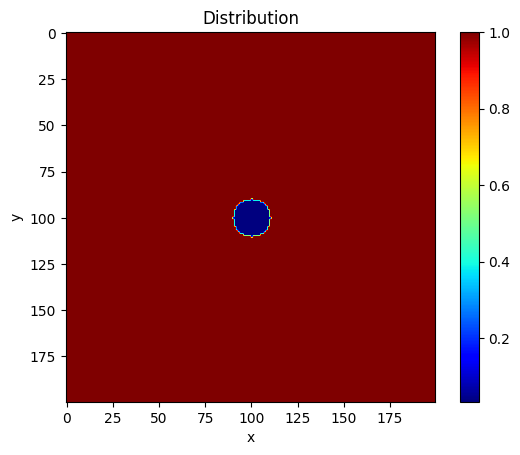

In [29]:
# Visualize permittivity distribution
plt.imshow(tm_sim.gaz, cmap='jet')
plt.title('Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(cmap='jet')
plt.show()

### Test simulation

In [30]:
for i in range(1, tm_sim.time_steps):
    tm_sim.simulation_step(i)

In [31]:
def plot_e_field_imshow(ax, data): 
    """Contour Plot of E field at a single time step""" 
    plt.imshow(data, cmap='jet') 
    #CP.collections[4].remove() 
    # above removes extraneous outer contour display 
    ax.set_xticks(np.arange(0,tm_sim.nx, step=20)) 
    ax.set_yticks(np.arange(0,tm_sim.ny, step=20))
    plt.colorbar(cmap='jet')
    plt.xlabel('cm') 
    plt.ylabel('cm')

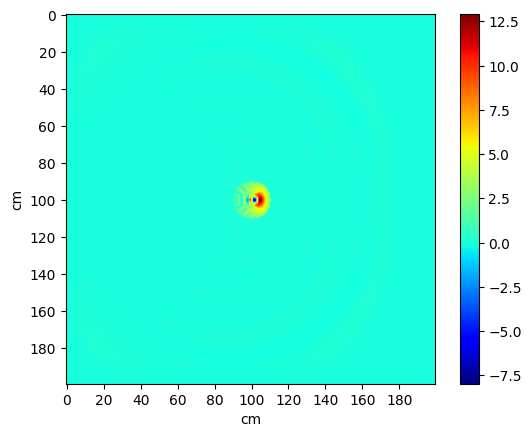

In [32]:
X, Y = np.meshgrid(range(tm_sim.nx), range(tm_sim.ny))
fig, ax = plt.subplots()
plot_e_field_imshow(ax, tm_sim.Dz)


In [33]:
def plot_e_field(ax, data, timestep, label):
    """
    3D Plot of E field at a single time step
    """
    #ax.set_zlim(0, 1)
    #ax.view_init(elev=20., azim=45)
    ax.plot_surface(X, Y, data[:, :], rstride=1, cstride=1,
                    color='white', edgecolor='black', linewidth=.25)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$E_{Z}$', rotation=90, labelpad=10, fontsize=14)
    ax.set_zticks([0, 0.5, 1])
    ax.set_xlabel('cm')
    ax.set_ylabel('cm')
    ax.set_xticks(np.arange(0, tm_sim.nx, step=20))
    ax.set_yticks(np.arange(0, tm_sim.ny, step=20))
    ax.text2D(0.6, 0.7, "T = {}".format(timestep), transform=ax.transAxes)
    plt.gca().patch.set_facecolor('white')
    ax.text2D(-0.2, 0.8, "({})".format(label), transform=ax.transAxes)
    ax.dist = 11


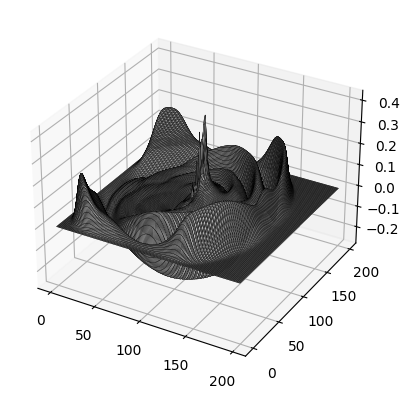

In [34]:
X, Y = np.meshgrid(range(tm_sim.nx), range(tm_sim.ny))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, tm_sim.Ez[:, :], rstride=1, cstride=1,
                    color='white', edgecolor='black', linewidth=.25)